In [340]:
# Import the main libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

In [342]:
df = pd.read_csv('Bitcoin_Historical_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3724 non-null   object 
 1   Adj Close  3724 non-null   float64
 2   Close      3724 non-null   float64
 3   High       3724 non-null   float64
 4   Low        3724 non-null   float64
 5   Open       3724 non-null   float64
 6   Volume     3724 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 203.8+ KB


In [343]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100


#### For any trading data, these columns represent:

#### 1. Adjusted Close --> The closing price of the asset adjusted for factors like splits, dividends, and other events that affect the stock's price. This value reflects the true value of the asset over time for analysis and comparison.

#### 2. Close --> The last traded price of the asset for the given period (e.g., day, hour). It represents the final price when the market is closed.

#### 3. High --> The highest price the asset reached during the given period.

#### 4. Open --> The first traded price of the asset when the market opened for the period.

#### 5. Volume --> The total amount of the asset during the period. For Bitcoin, this is typically measured in BTC or a fraction of it.

#### Let's see if we have any missing values in our dataset:

In [346]:
for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values == 0:
        result = f"{BLUE}{missing_values} missing values{RESET}"
    else:
        result = f"{RED}{missing_values} missing values{RESET}"

    print(f"Column '{col}' has {result}")

Column 'Date' has 0 missing values
Column 'Adj Close' has 0 missing values
Column 'Close' has 0 missing values
Column 'High' has 0 missing values
Column 'Low' has 0 missing values
Column 'Open' has 0 missing values
Column 'Volume' has 0 missing values


#### There are no missing values. Let's check the data type that we have in the dataset:

In [348]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    num_unique_values = df[col].nunique()
    if pd.api.types.is_numeric_dtype(df[col]):
        dtype = f"{BLUE}numerical{RESET}"  # Make "numerical" blue
    else:
        dtype = f"{RED}categorical{RESET}"  # Make "categorical" red

    print(f"Column '{col}' has {num_unique_values} unique {dtype} items")

Column 'Date' has 3724 unique categorical items
Column 'Adj Close' has 3721 unique numerical items
Column 'Close' has 3721 unique numerical items
Column 'High' has 3721 unique numerical items
Column 'Low' has 3722 unique numerical items
Column 'Open' has 3720 unique numerical items
Column 'Volume' has 3724 unique numerical items


#### As we can see, the 'Date' column present categorical values, and they should be in the correct date format, so we are going to convert them:

In [350]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')

In [351]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3724 entries, 0 to 3723
Series name: Date
Non-Null Count  Dtype              
--------------  -----              
3724 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 29.2 KB


#### Sometimes this process can lead to errors in the format, so we are going to check if this happened to us:

In [353]:
if df['Date'].isnull().any():
    print('Revise the dataset, there may be some format errors.')
else:
    print('Datetime conversion successful')

Datetime conversion successful


#### Now that the Date column is in the correct format, we are going to generate some new columns:

In [355]:
df['Year'] = df['Date'].dt.year

In [356]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Year
0,2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,2014
1,2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,2014
2,2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,2014
3,2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,2014
4,2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,2014


#### Next, we will estimate the trading value in dollars for each period by averaging the high and low prices (which gives us a rough estimate of the trading price) and multiplying this average price by the trading volume to estimate the total value of trades during the period.

In [358]:
df['Dollars'] = ((df['High'] + df['Low'])/2) * df['Volume']
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Year,Dollars
0,2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800,2014,9.692403e+09
1,2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200,2014,1.499957e+10
2,2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700,2014,1.540236e+10
3,2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600,2014,1.498835e+10
4,2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100,2014,1.070656e+10


#### Now we can perform a simple statistical analysis of the dataset:

In [360]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Adj Close,3724.0,1.884868e+04,2.087355e+04,1.781030e+02,1.198755e+03,9.284764e+03,3.018201e+04,9.899766e+04
Close,3724.0,1.884868e+04,2.087355e+04,1.781030e+02,1.198755e+03,9.284764e+03,3.018201e+04,9.899766e+04
High,3724.0,1.925192e+04,2.130979e+04,2.117310e+02,1.217055e+03,9.440763e+03,3.060588e+04,9.965550e+04
Low,3724.0,1.838143e+04,2.036535e+04,1.715100e+02,1.178120e+03,9.134779e+03,2.958091e+04,9.723289e+04
Open,3724.0,1.882529e+04,2.084308e+04,1.768970e+02,1.192668e+03,9.284071e+03,3.015341e+04,9.900674e+04
Volume,3724.0,1.814878e+10,1.975859e+10,5.914570e+06,3.519457e+08,1.442858e+10,2.919828e+10,3.509679e+11
Year,3724.0,2.019302e+03,2.954410e+00,2.014000e+03,2.017000e+03,2.019000e+03,2.022000e+03,2.024000e+03
Dollars,3724.0,6.104612e+14,1.047990e+15,2.307853e+09,3.933484e+11,1.834315e+14,7.715237e+14,1.628941e+16


## Exploratory Data Analysis

#### We can start analysing the data by plotting an evolution of the closing price of Bitcoin in boxplot and scatter formats

Text(0.5, 1.0, 'Yearly Distribution of Bitcoin Prices')

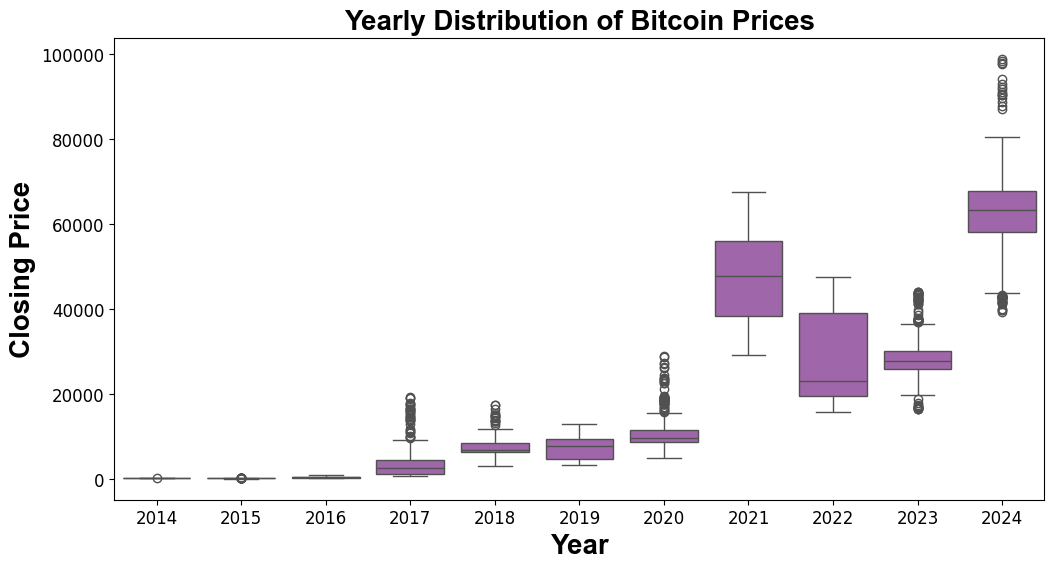

In [362]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Year', y = 'Close', data = df, color = '#a75bb4')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Year', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Closing Price', fontsize = 20, fontweight='bold', **csfont)
plt.title('Yearly Distribution of Bitcoin Prices', fontsize = 20, fontweight='bold', **csfont)

#### Each box represents the distribution of Bitcoin closing prices for a given year. The middle line in each box is the median closing price, and the box edges represent the interquartile range (IQR), showing the spread of the middle 50% of prices. The whiskers in the boxplots extend the minimum and maximum prices within 1.5 times the IQR, and the dots outside the whiskers represent extreme price fluctuations (outliers).

#### With the box plot we can focus on the distribution and summary statistics of prices within each year (median, range, and outliers). 

#### We can see that the price of Bitcoin shows a significant upward trend over the years, with more variability (wider boxes and more outliers) in later years. Noticeable spikes in price volatility occurred around 2017, 2021 and 2024, reflecting Bitcoin's boom periods. In the earlier years (2.14 - 2016), the prices were relatively stable and much lower.

Text(0.5, 1.0, 'Yearly Distribution of Bitcoin Prices')

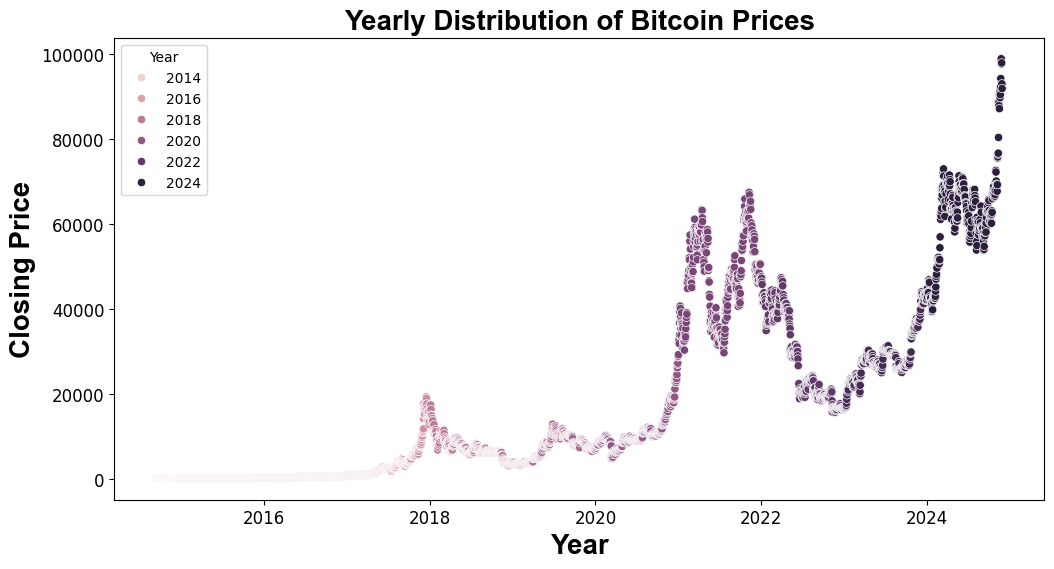

In [364]:
from seaborn import scatterplot

plt.figure(figsize=(12, 6))
scatterplot(data = df, x = 'Date', y = 'Close', hue = 'Year', color = '#a75bb4')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Year', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Closing Price', fontsize = 20, fontweight='bold', **csfont)
plt.title('Yearly Distribution of Bitcoin Prices', fontsize = 20, fontweight='bold', **csfont)

#### With the scatter plot we can see a more detailed daily view of Bitcoin's price movement over time, showing specific trends and fluctuations.

#### In the scatter plot, we can see that each point represents the Bitcoin's closing price for a specific day. The scatter plot clearly shows the trend of increasing Bitcoin prices over time, with most evident spikes in 2017, 2021 and 2024 (as we saw in the boxplot) with noticeable increase in the price volatility as time progresses. The distribution of points in later years (darker shades) indicates laerger fluctuations compared to earlier years (lighter shades).

#### We can also represent the daily price range of Bitcoin:

Text(0.5, 1.0, 'BTC Daily Price Range')

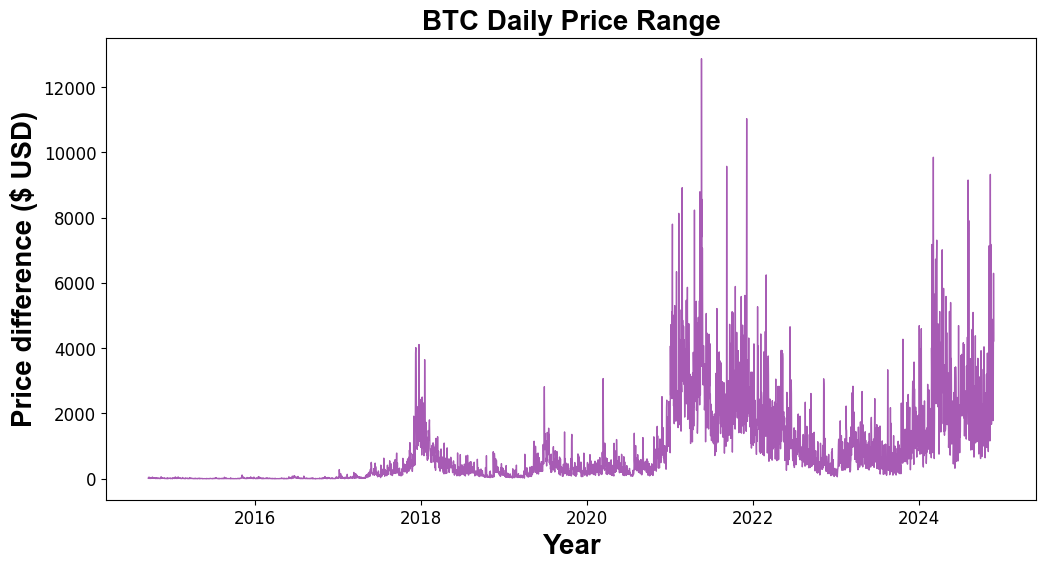

In [366]:
plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['High'] - df['Low'], color = '#a75bb4', linewidth = 1)
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Year', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Price difference ($ USD)', fontsize = 20, fontweight='bold', **csfont)
plt.title('BTC Daily Price Range', fontsize = 20, fontweight='bold', **csfont)

#### From this graph, we can see that before 2017, the price range remains relatively small and stable. This is expected because Bitcoin prices were much lower during this period, with limited market activity and volatility. In the 2017-2018 range, we have our fist spike represented with a sharp increase in daily price. From 2020 onward, the graph shows several large spikes, particularly in 2021 and 2022, reflecting major price movements in response to market events. Finally, in recent dates (2024) the graph indicates continued high volatitly, with large daily price swings persisting in the latest years.

#### Let's make a similar plot analysing the volume column over the years:

Text(0.5, 1.0, 'BTC Volume over the years')

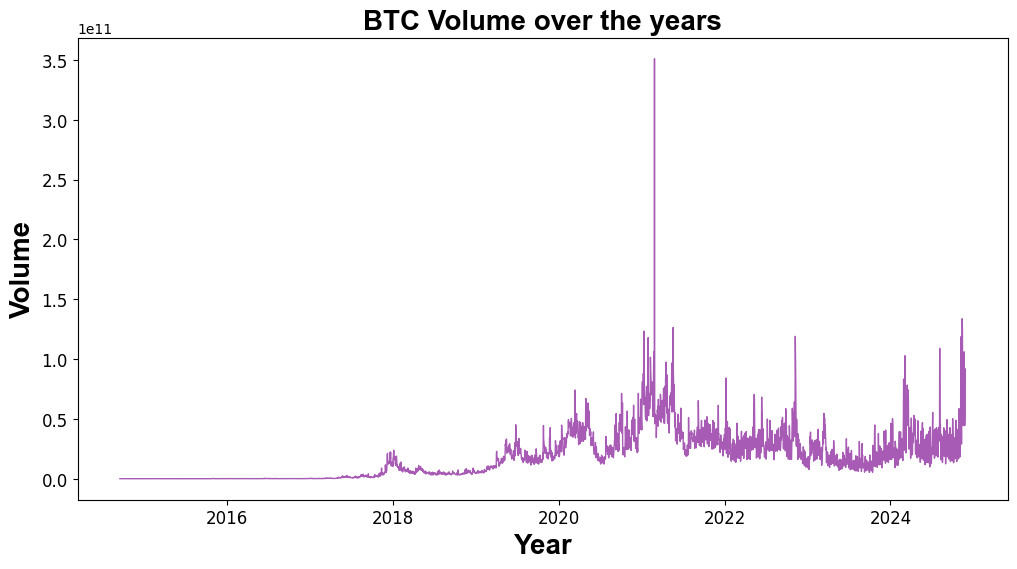

In [368]:
plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['Volume'], color = '#a75bb4', linewidth = 1)
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Year', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Volume', fontsize = 20, fontweight='bold', **csfont)
plt.title('BTC Volume over the years', fontsize = 20, fontweight='bold', **csfont)

#### We can see that the volume (total number of assets) of Bitcoin has generally increased over the years, with significant spikes at certain points. In the 2017 - 2018 period, we can see a sharp increase in volume, possibly coinciding with the cryptocurrency market's rise in popularity during that period. During the 2020 - 2021 period, another surge in volume is visible. Around 2022 there is a significant drop in volume, which may be related with the market downturn. Finally, in the 2023 - 2024 period, the volume seems to be recovering.

#### We can finally explore the correlation between the different components of the dataset with a correlation map:

Text(0.5, 1.0, 'Correlation map')

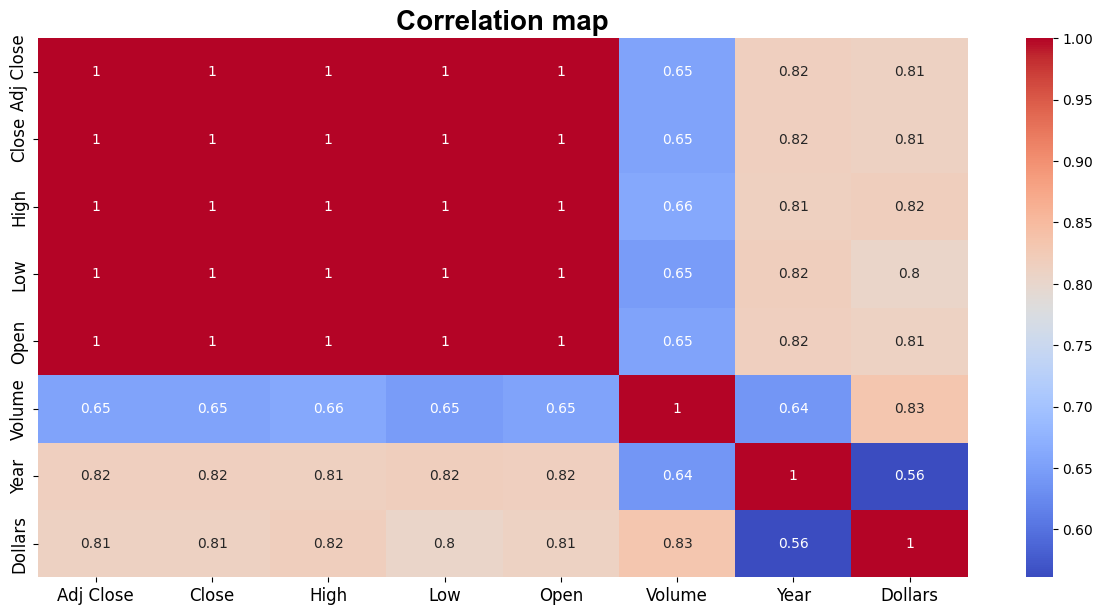

In [370]:
corr = df.corr(numeric_only = True)

plt.figure(figsize=(15,7))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Correlation map', fontsize = 20, fontweight='bold', **csfont)

#### There is a strong correlation between the Adj Close, Close, High, Low and Open columns, which is expected as they all represent different aspects of the Bitcoin price. There is also a strong correlation between the Volume and Dollars columns, suggesting that increased trading activity often leads to higher prices. There is a moderate correlation between trading volume and the price variables, suggesting that higher trading volumes lead to higher prices.

## Train/test split

In [493]:
data = df.filter(['Close'])                               # Create a new dataframe with only the 'Close' column 
dataset = data.values                                     # Convert the dataframe to a numpy array
training_data_len = int(np.ceil( len(dataset) * 0.95 ))    # Get the number of rows to train the model on

#### We are going to use the LSTM model for the prediction of the bitcoin close value. This model often benefits from scaling. This step helps stabilise the training by putting all features on a similar scale, which can speed up convergence and prevent exploding gradients.

In [495]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(dataset)

In [497]:
train_data = scaled_data[0:int(training_data_len), :]

X_train = []
y_train = []

for i in range (60, len(train_data)):             # Starts the loop at index 60 because we need 60 previous data points to form the first sequence and ends at the last data point
    X_train.append(train_data[i-60:i, 0])         # X takes the first 60 points
    y_train.append(train_data[i, 0])              # y takes the next point (61)
    if i <= 61:
        print('X_train = ', X_train)
        print('y_train = ', y_train)
        print()

X_train =  [array([0.00282567, 0.0024928 , 0.00219281, 0.00233558, 0.00223355,
       0.00226725, 0.00260766, 0.0024803 , 0.0023626 , 0.00229025,
       0.00224062, 0.00201456, 0.00199722, 0.00211336, 0.00207967,
       0.00199322, 0.00183576, 0.00152564, 0.00144108, 0.00153791,
       0.00159972, 0.00176926, 0.00189156, 0.00185651, 0.00186396,
       0.0020284 , 0.00214847, 0.00225428, 0.00219258, 0.00206895,
       0.00208112, 0.00215887, 0.00213969, 0.00207188, 0.00210861,
       0.00207504, 0.00182468, 0.00182395, 0.00171189, 0.00178711,
       0.00176975, 0.00181659, 0.00159369, 0.00169199, 0.00162132,
       0.0014941 , 0.00149554, 0.00151236, 0.00154209, 0.00163311,
       0.00173232, 0.00166275, 0.00169384, 0.00187373, 0.00191077,
       0.00191857, 0.0024839 , 0.0024553 , 0.0022234 , 0.00200396])]
y_train =  [0.0021228488513504243]

X_train =  [array([0.00282567, 0.0024928 , 0.00219281, 0.00233558, 0.00223355,
       0.00226725, 0.00260766, 0.0024803 , 0.0023626 , 0.00229025,


In [499]:
# Now we transform our data into numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# And we reshape it to the correct shape required by the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(3478, 60, 1)

## LSTM Model training

In [501]:
import tensorflow as tf
tf.__version__

'2.16.1'

In [503]:
# Initialize the LSTM model
lstm = tf.keras.models.Sequential()

# Add LSTM layers
lstm.add(tf.keras.layers.LSTM(units = 128, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm.add(tf.keras.layers.LSTM(units = 64, activation = 'relu', return_sequences = False))

# Add Dense layers
lstm.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
lstm.add(tf.keras.layers.Dense(units = 1))  # Output layer (no activation, assuming regression)

# Compile the model
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Display the model summary
lstm.summary()

C:\Users\gabri\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [505]:
lstm.fit(X_train, y_train, batch_size = 1, epochs = 2)

Epoch 1/2
3478/3478 ━━━━━━━━━━━━━━━━━━━━ 85s 23ms/step - loss: 0.0035
Epoch 2/2
3478/3478 ━━━━━━━━━━━━━━━━━━━━ 79s 23ms/step - loss: 5.2809e-04


#### We need to create the test dataset to evaluate the performance of the model

In [506]:
test_data = scaled_data[training_data_len - 60:, :]

X_test = []
y_test = y[training_data_len:, :]

for i in range(60, len(test)):

    X_test.append(test[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

In [507]:
y_pred = lstm.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


In [508]:
y_pred = sc.inverse_transform(y_pred)  # Apply the inverse scaler to recover the original data

In [509]:
rmse = np.sqrt(np.mean(((y_pred - y_test) ** 2)))  # Get the root mean squared error (RMSE)

rmse

67575.51932237414

In [517]:
train_data = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = y_pred

C:\Users\gabri\AppData\Local\Temp\ipykernel_14780\1144065399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_pred


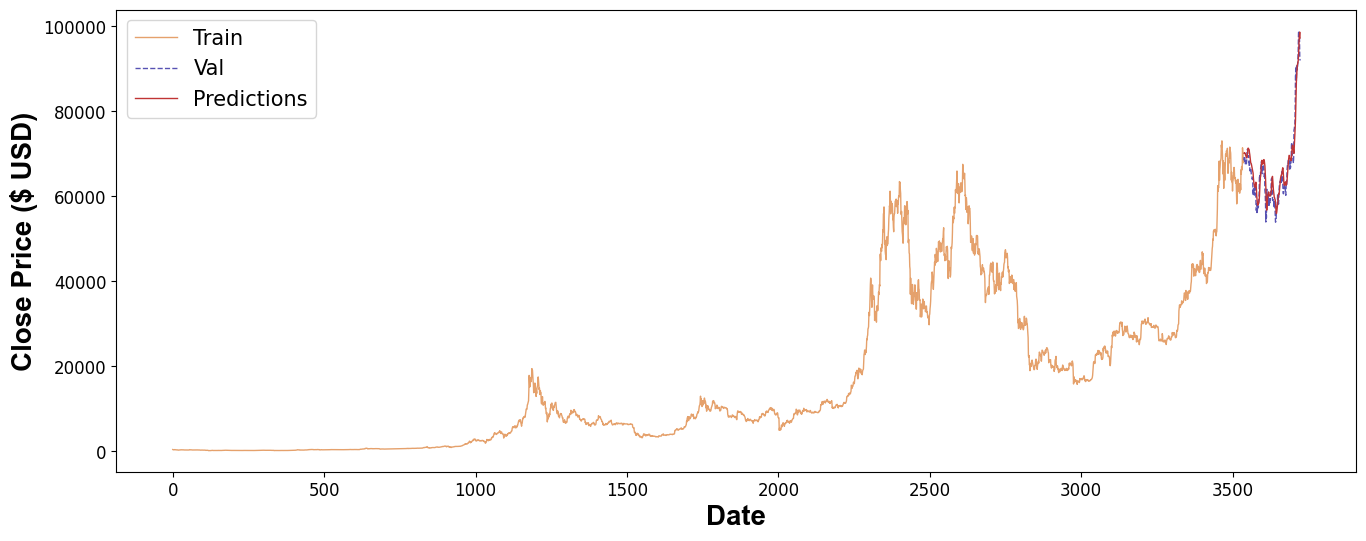

In [547]:
# Visualize the data

plt.figure(figsize=(16,6))

plt.plot(train_data['Close'], color = '#e5a16c', linewidth = 1)
plt.plot(valid['Close'], '--', color = '#5752b3', linewidth = 1)
plt.plot(valid['Predictions'], color = '#c03434', linewidth = 1)
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Date', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Close Price ($ USD)', fontsize = 20, fontweight='bold', **csfont)
plt.legend(['Train', 'Val', 'Predictions'], fontsize = 15, ncol = 1)

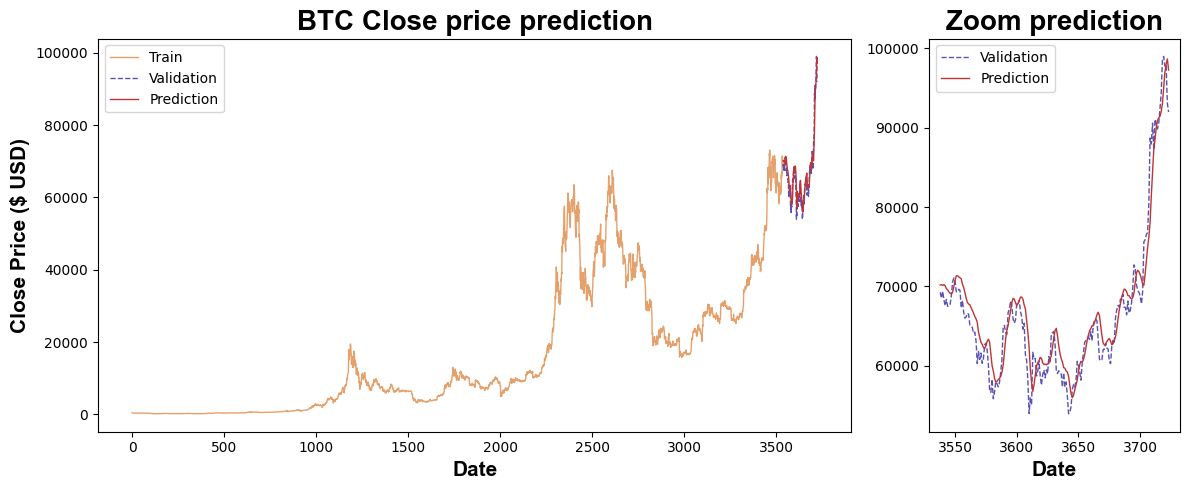

In [601]:
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(12, 5))
csfont = {'fontname':'Arial'}

# Define the grid layout (2 rows, 1 column)
gs = gridspec.GridSpec(1, 2, width_ratios=[0.9, 0.3])  # Control width of each subplot (70% and 30%)

# Create subplots using the grid specification
ax1 = fig.add_subplot(gs[0])  # First subplot
ax2 = fig.add_subplot(gs[1])  # Second subplot

# Plot data on each axis
ax1.plot(train_data['Close'], color = '#e5a16c', linewidth = 1, label = 'Train')
ax1.plot(valid['Close'], '--', color = '#5752b3', linewidth = 1, label = 'Validation')
ax1.plot(valid['Predictions'], color = '#c03434', linewidth = 1, label = 'Prediction')
ax1.set_title("BTC Close price prediction", fontsize = 20, fontweight='bold', **csfont)
ax1.set_xlabel("Date", fontsize=15, fontweight='bold', **csfont)
ax1.set_ylabel("Close Price ($ USD)", fontsize=15, fontweight='bold', **csfont)
ax1.legend()

ax2.plot(valid['Close'], '--', color = '#5752b3', linewidth = 1, label = 'Validation')
ax2.plot(valid['Predictions'], color = '#c03434', linewidth = 1, label = 'Prediction')
ax2.set_title("Zoom prediction", fontsize = 20, fontweight='bold', **csfont)
ax2.set_xlabel("Date", fontsize=15, fontweight='bold', **csfont)
ax2.legend()

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()
